In [1]:
import pandas as pd
import numpy as np
import re
import random
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.style.use('ggplot')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
prod_assoc = pd.read_csv('../data/product_associations.csv')
sample_df = pd.read_csv('../data/sample_basket.csv')

In [4]:
from basketfunctions import change_set, get_recent_SKUs, get_product_history, get_recommendations

In [5]:
prod_assoc[['antecedents', 'consequents']] = prod_assoc[['antecedents', 'consequents']].applymap(lambda x: change_set(x))

In [6]:
customerCode = 'JBO001381'
top_x = 3

In [8]:
mapped_products = pd.read_csv('../data/mapped_productcodes.csv')

In [9]:
custSKUs = get_recent_SKUs(customerCode, sample_df)
product_qty, product_amt = get_product_history(customerCode, sample_df)
products = pd.concat([product_qty, product_amt], axis=1)
products.index.name = None
products.index = products.index.astype('str')

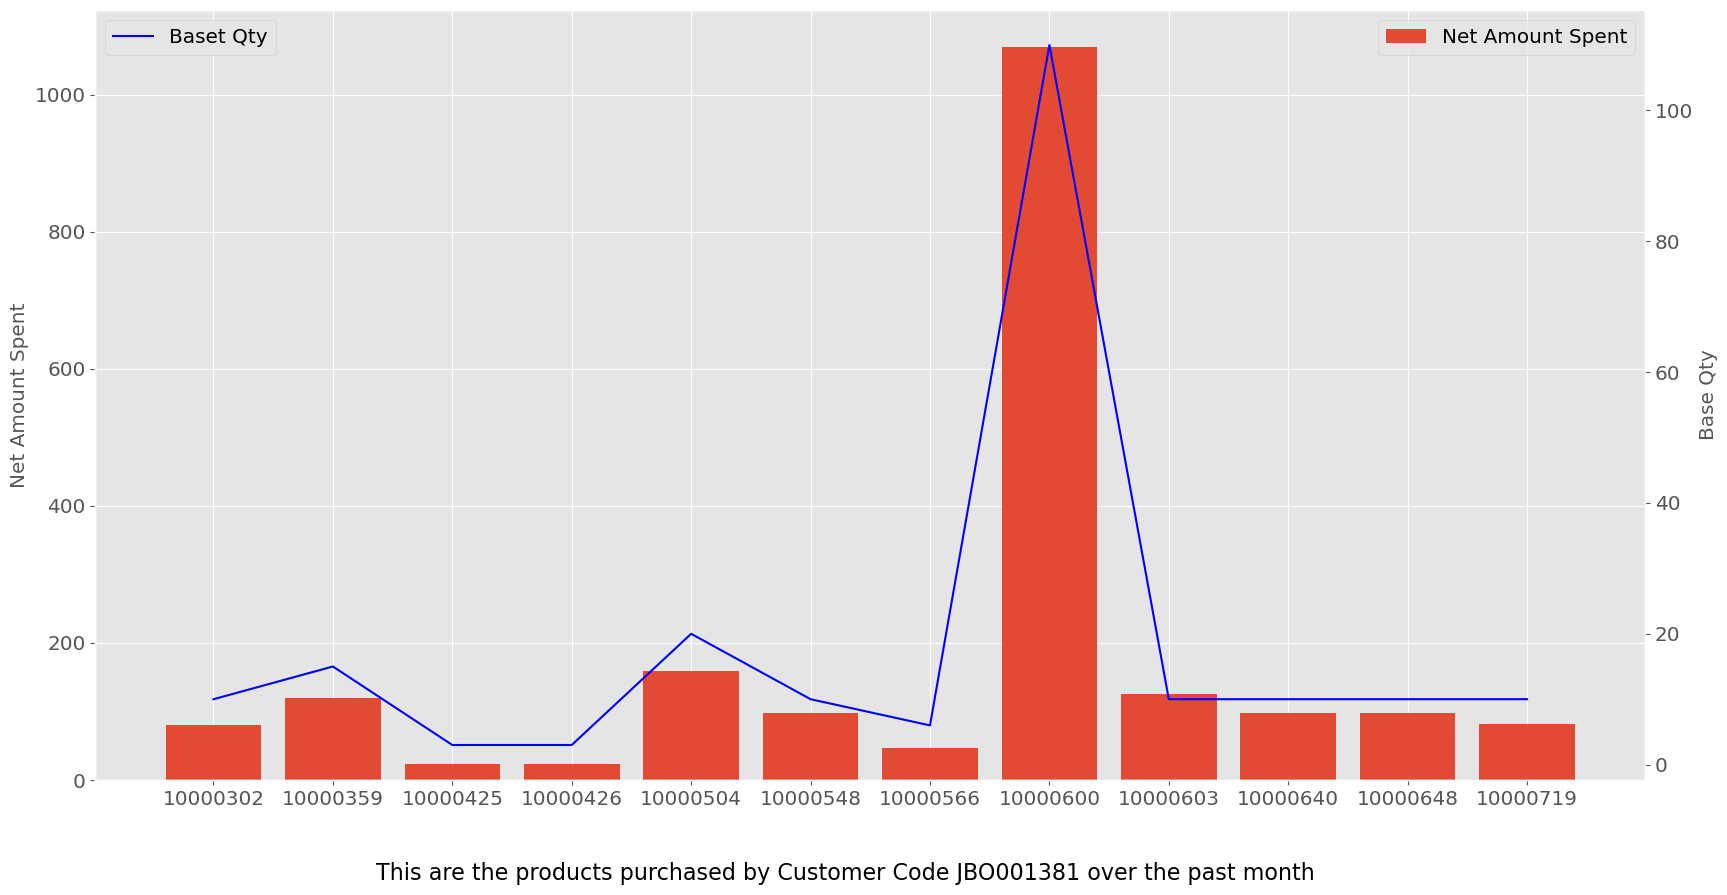

In [10]:
fig, ax1 = plt.subplots()

ax1.bar(products.index, products['NetAmount'])
ax1.set_ylabel('Net Amount Spent')
ax1.legend(['Net Amount Spent'], loc='upper right')

ax2 = ax1.twinx()

ax2.plot(products.index, products['BaseQty'], color='blue')
ax2.grid(False)
ax2.set_ylabel('Base Qty')
ax2.legend(['Baset Qty'], loc="upper left")

txt = f"This are the products purchased by Customer Code {customerCode} over the past month"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=16)

plt.show()

In [12]:
recommendations = get_recommendations(custSKUs, top_x, prod_assoc)
sorted_codes = [code[0] for code in sorted(recommendations.items(), key = lambda item: item[1], reverse=True)]

In [13]:
print(f"These are the Top {top_x} items we recommend for {customerCode} this visit.")
product_recs = pd.DataFrame({
    'Product Code': sorted_codes,
}, index=[x + 1 for x in range(top_x)])
product_recs

These are the Top 3 items we recommend for JBO001381 this visit.


,Product Code
1,10000604
2,10000602
3,10000512
